# Phone Data Visualization

This notebook is designed to explore and visualize the dataset of phone specifications and prices. The main goal is to understand the relationships between different features and the target variable (price), which will help in selecting an appropriate model for price prediction.

In [4]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = './data/cleaned_all_phones.csv'
phones_df = pd.read_csv(file_path)

# Show the first few rows of the dataset
phones_df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


## Distribution of Phone Prices

The distribution of phone prices in the dataset.

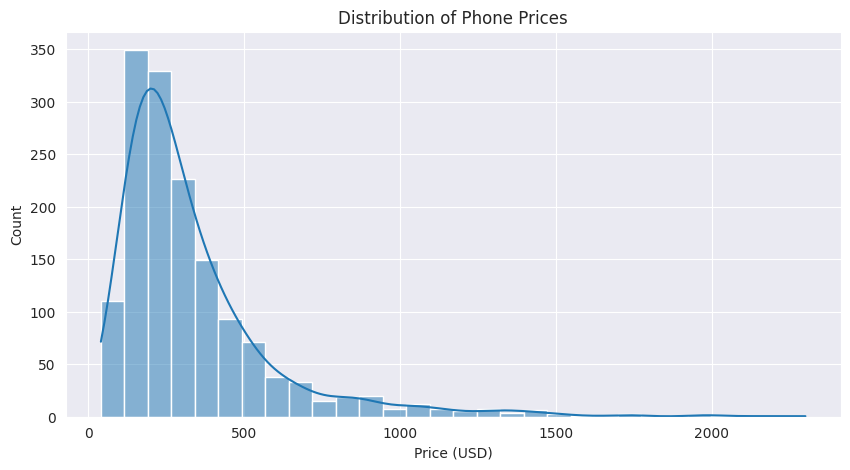

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a histogram for the phone prices
sns.histplot(phones_df['price(USD)'], bins=30, kde=True)

# Add labels and title
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.title('Distribution of Phone Prices')
plt.show()

## Correlation Matrix

One-hot-coding some of the attribute first.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Select non-numeric columns
non_numeric_columns = phones_df.select_dtypes(include=['object']).columns

# Apply Label Encoding to ordinal variables if any (for demonstration, applying to all non-numeric columns)
label_encoded_df = phones_df.copy()
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    label_encoded_df[col] = label_encoder.fit_transform(phones_df[col])

# Show the first few rows of the transformed dataframe
label_encoded_df.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,1238,3,8,5.0,71,2200,1,2,0,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,582,4,12,5.3,71,2700,0,2,1,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,788,3,12,5.2,0,3000,0,4,2,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,1017,12,10,5.5,0,4100,1,4,2,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,769,3,12,5.1,0,3200,0,4,3,145.0,...,True,True,False,True,True,False,False,False,False,420.0


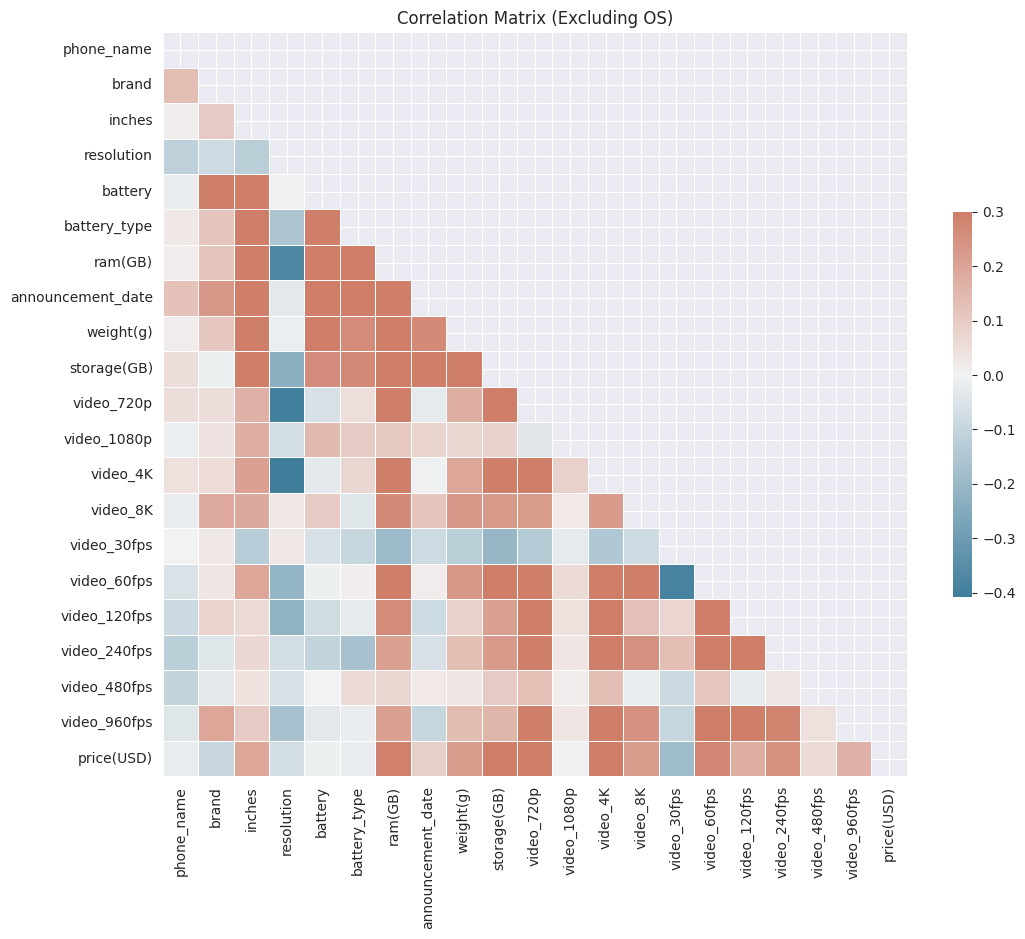

In [16]:
# Drop the "os" column from the label encoded dataframe
label_encoded_df_dropped_os = label_encoded_df.drop('os', axis=1)

# Calculate the correlation matrix without the "os" column
corr_label_encoded_dropped_os = label_encoded_df_dropped_os.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_label_encoded_dropped_os, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_label_encoded_dropped_os, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix (Excluding OS)')
plt.show()



## Brand Distribution 
xiaomi is the most brand produce mobiles and Google is the least

<Axes: xlabel='brand'>

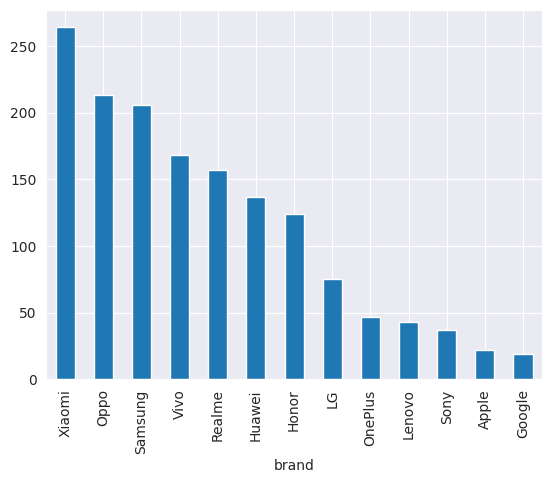

In [18]:
phones_df.brand.value_counts().plot(kind = 'bar')

## OS Distribution
Most phone using Android 11 & 10 in the dataset.

<Axes: xlabel='os'>

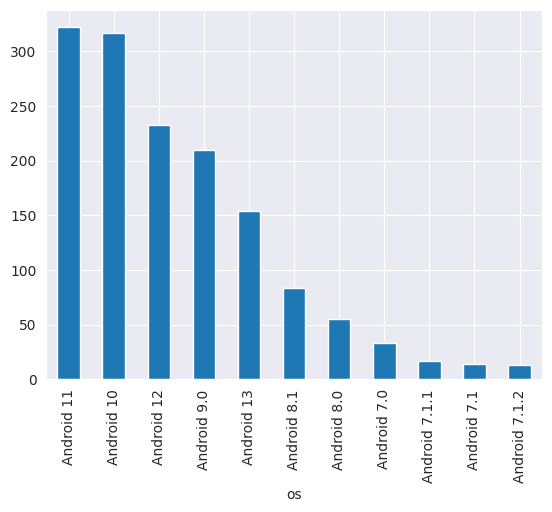

In [20]:
phones_df.os.value_counts().head(11).plot(kind = 'bar')

## Relationships with Price

Now, let's create scatter plots to visually inspect the relationships between some of the numerical features and the target variable (price).

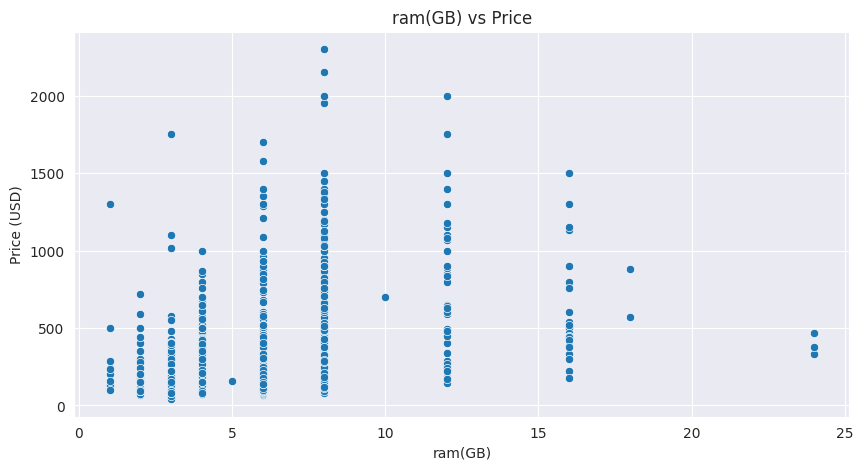

In [8]:
# Scatter plot for ram(GB) vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=phones_df, x='ram(GB)', y='price(USD)')
plt.xlabel('ram(GB)')
plt.ylabel('Price (USD)')
plt.title('ram(GB) vs Price')
plt.show()


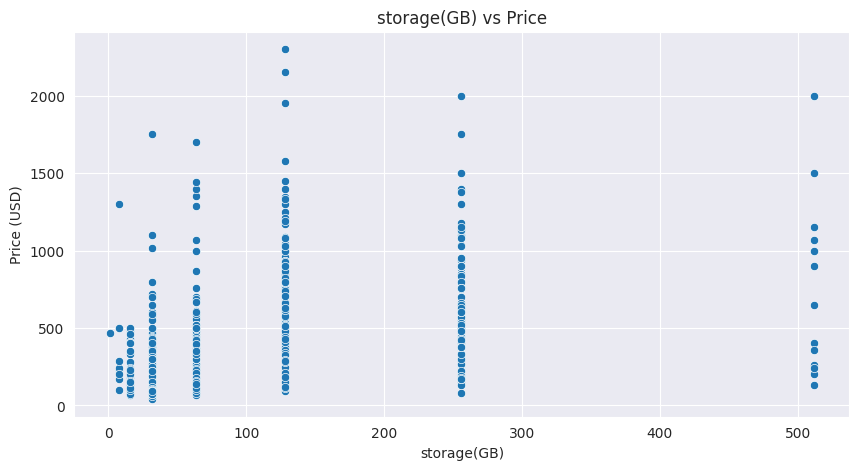

In [9]:
# Scatter plot for storage(GB) vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=phones_df, x='storage(GB)', y='price(USD)')
plt.xlabel('storage(GB)')
plt.ylabel('Price (USD)')
plt.title('storage(GB) vs Price')
plt.show()


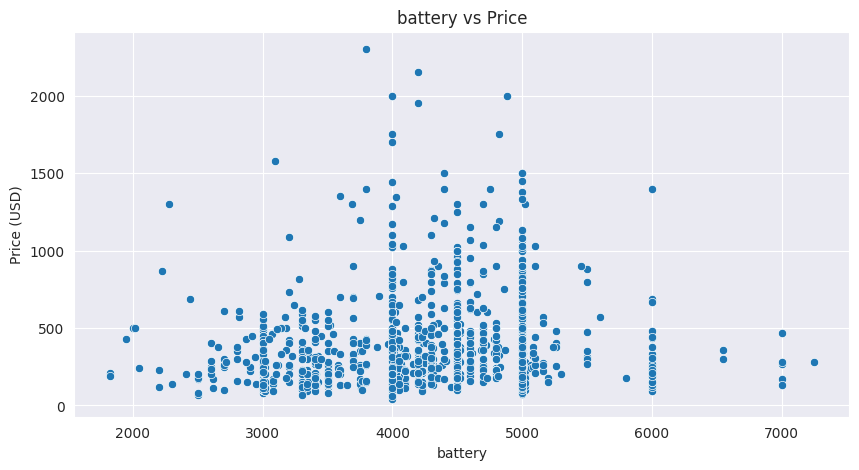

In [10]:
# Scatter plot for battery vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=phones_df, x='battery', y='price(USD)')
plt.xlabel('battery')
plt.ylabel('Price (USD)')
plt.title('battery vs Price')
plt.show()


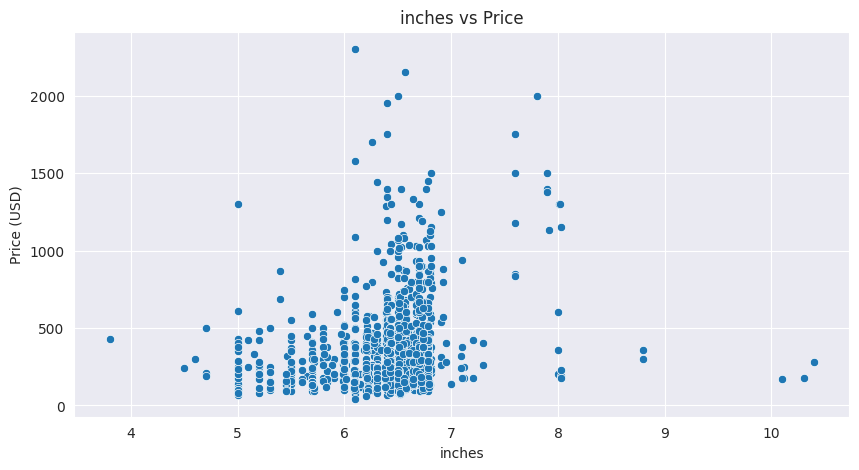

In [11]:
# Scatter plot for inches vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=phones_df, x='inches', y='price(USD)')
plt.xlabel('inches')
plt.ylabel('Price (USD)')
plt.title('inches vs Price')
plt.show()


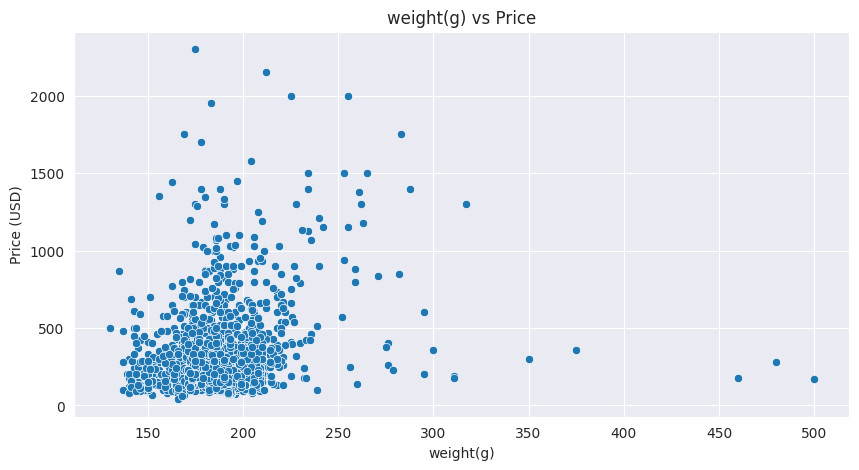

In [12]:
# Scatter plot for weight(g) vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=phones_df, x='weight(g)', y='price(USD)')
plt.xlabel('weight(g)')
plt.ylabel('Price (USD)')
plt.title('weight(g) vs Price')
plt.show()
